<a id='Title-Intermediate-ConvNet'></a>
<h1 style="color:SlateGray;">Intermdiate ConvNet</h1>

**Input dataset**

Kaggle Cats and Dogs: a set of evenly split cat and dog images.

**Output classification**

Predict whether an image contains a cat or a dog.

<h2 style="color:SlateGray;">Background</h2>

**Layers**

[*Dense*](1_Image_Classification.ipynb#Layers-Dense)

[*Conv2D*](6_Basic_ConvNet.ipynb#Layers-Conv2D)

[*MaxPooling2D*](6_Basic_ConvNet.ipynb#Layers-MaxPooling2D)

[*Flatten*](6_Basic_ConvNet.ipynb#Layers-Flatten)

**Activations**

[*relu*](1_Image_Classification.ipynb#Activations-relu)

[*sigmoid*](2_Binary_Classification.ipynb#Activations-sigmoid)
		
**Optimizers**

[*rmsprop*](1_Image_Classification.ipynb#Optimizers-rmsprop)
		
**Loss functions**

[*binary_crossentropy*](2_Binary_Classification.ipynb#Loss-functions-binary_crossentropy)

<h2 style="color:SlateGray;">Overview</h2>

Explore built-in image data augmentation utilities.

This example leverages the ImageDataGenerator class to flow in data from structured directories serving as labeled containers. ImageDataGenerators can distort images creating the illusion of having more unique data than what is actually available yielding better generalization performance.

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
import os, shutil

original_dataset_dir = r'./kaggle_original_data'

base_dir = r'./cats_and_dogs_small'
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(validation_dir):
    os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir):
    os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
from keras import layers
from keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [5]:
from keras import optimizers

model1.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history1 = model1.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=(validation_generator),
                              validation_steps=50)

model1.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 15s 151ms/step - loss: 0.6928 - acc: 0.5640 - val_loss: 0.6673 - val_acc: 0.5840
Epoch 2/30
100/100 [==============================] - 9s 85ms/step - loss: 0.6150 - acc: 0.6650 - val_loss: 0.6052 - val_acc: 0.6710
Epoch 3/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5539 - acc: 0.7205 - val_loss: 0.6046 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 8s 79ms/step - loss: 0.5025 - acc: 0.7570 - val_loss: 0.5758 - val_acc: 0.7010
Epoch 5/30
100/100 [==============================] - 7s 72ms/step - loss: 0.4615 - acc: 0.7780 - val_loss: 0.5700 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 7s 72ms/step - loss: 0.4174 - acc: 0.8075 - val_loss: 0.5742 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 7s 72ms/step - loss: 0.3841 - acc: 0.8365 - val_loss: 0.6057 - val_acc: 0.6980
Epoch 8/30
100/100 [==============================] - 7s 73ms/step 

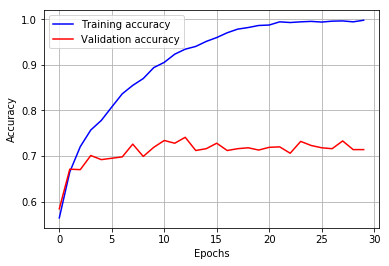

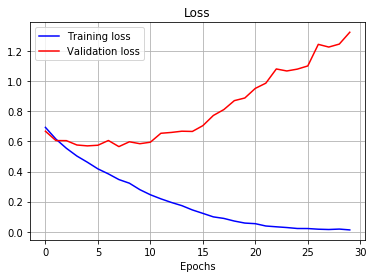

In [7]:
import matplotlib.pyplot as plt

acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.legend()
plt.grid()

plt.show()

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model1.summary()

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [10]:
history2 = model2.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

model2.save('cats_and_dogs_small_2.h5')

Epoch 1/30
100/100 [==============================] - 26s 256ms/step - loss: 0.6888 - acc: 0.5250 - val_loss: 0.6735 - val_acc: 0.5890
Epoch 2/30
100/100 [==============================] - 21s 214ms/step - loss: 0.6710 - acc: 0.5809 - val_loss: 0.6461 - val_acc: 0.6110
Epoch 3/30
100/100 [==============================] - 21s 212ms/step - loss: 0.6531 - acc: 0.6122 - val_loss: 0.6404 - val_acc: 0.6190
Epoch 4/30
100/100 [==============================] - 20s 200ms/step - loss: 0.6317 - acc: 0.6344 - val_loss: 0.6125 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 21s 209ms/step - loss: 0.6175 - acc: 0.6513 - val_loss: 0.6056 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 23s 226ms/step - loss: 0.6007 - acc: 0.6731 - val_loss: 0.5858 - val_acc: 0.6820
Epoch 7/30
100/100 [==============================] - 20s 197ms/step - loss: 0.5950 - acc: 0.6672 - val_loss: 0.5746 - val_acc: 0.6940
Epoch 8/30
100/100 [==============================] - 2

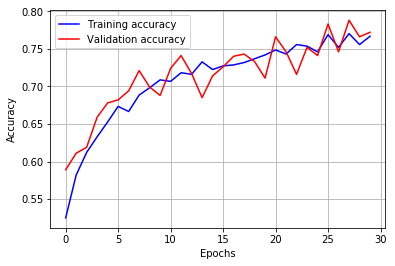

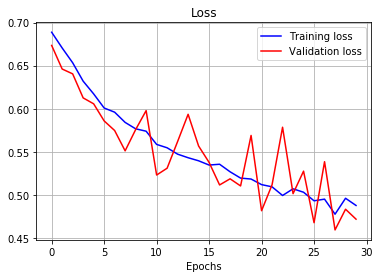

In [11]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.legend()
plt.grid()

plt.show()